<a href="https://colab.research.google.com/github/Jaewon45/ESAA_2022/blob/main/1128_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 ch3. 1-4, pg. 50~95
# Part 03. 케라스 (Keras)
## 01. 딥러닝 준비
- 텐서플로2부터 케라스 API를 내재화
- 케라스 
 - GPU 연산을 수행하는 기능을 직접 실행하지 않고 벡엔드 엔진(텐서플로, CNTK, Theano, MXNet 등)을 지정하여 사용 - 2.4버전 이후로는 텐서플로만을 지원
 - 딥러닝 라이브러리를 쉽고 간결한 코드로 실행할 수 있게 만들어줌


### 1-1. 주요 용어
1. 하이퍼파라미터
- 딥러닝, 머신러닝 모델 훈련시 사용자가 직접 설정해주는 설정값 (학습속도, 반복훈련횟수 등)
- 하이퍼파라미터 튜닝은 딥러닝 마지막 단계에 진행
2. 과소적합, 과대적합
- 과소적합: 모델이 충분히 학습되지 않은 경우 예측 성능 저하
- 과대적합: 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태, 예측 데이터에 대한 예측오차가 발생할 확률이 커짐
3. 에포크
- 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프를 1 epoch라고 함
- 훈련데이터셋을 빠짐없이 모두 1번 모델 훈련에 사용하면 다음 epoch로 넘어가며 사전에 설정된 최대 epoch 횟수까지 반복적으로 진행하고 종료함
- 과소적합, 과대적합 방지를 위해 조기종료 설정 등 적절한 하이퍼파라미터로 설정해야 함
4. 손실함수
- 예측 값과 정답 값의 차이 또는 오차
- 딥러닝 모델에 적용하는 손실함수는 사용자가 정의
 - `이진 분류` : binary_crossentropy 손실함수, 출력층의 활성화 함수 'sigmoid'
 - `다중 분류` : categorical_crossentropy 손실함수, 출력층의 활성함수 'softmax' (다중 분류 대상 클래스가 'one-hot vector'인 경우)
 - `레이블 값` : (0, 1, 2, 3.. 등) sparse_categorical_crossentropy 손실함수
 - `회귀 모델` : 평균제곱오차(MSE), 평균절대값오차(MAE), 후버(Huber) 등 사용

In [21]:
# 클래스 및 함수 형태로 정의되어있는 손실 함수 지정 후 사용 예시
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

5. 경사하강법(gradient descent)
- 모델 훈련시 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하며 최소 함수 값을 갖도록 하는 방법
- 경사하강법 알고리즘을 적용해 손실함수 값을 최소로 만드는 가중치를 찾을 수 있음
- 옵티마이저(최적화함수)의 근간이 되는 알고리즘

##### 경사하강법 넘파이 구현
- 손실함수(목적함수) : $Loss = \frac{1}{2} \sum_i(y-\hat y)^2$
 - 1/2는 가중치에 대한 그래디언트를 계산하기 쉽도록 추가된 상수 값
- 단순선형회귀 수식 : $y=wx+b$

w:0.3, b:0.5


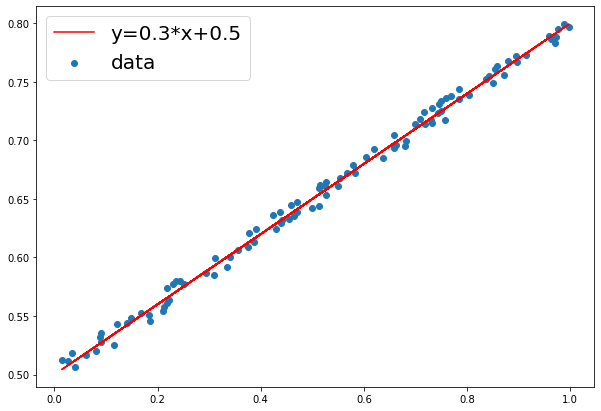

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w*x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10,7))
  plt.plot(x, y, color='r', label=f'y={w}*x+{b}')
  plt.scatter(x, yy, label='data')
  plt.legend(fontsize=20)
  print(f'w:{w}, b:{b}')
  return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

- 그래디언트 w 업데이트 최종 수식 : $w - \alpha \sum_i (y-\hat y)(x)$
 - $\alpha$는 학습률을 의미
- 그래디언트 b 업데이트 최종 수식 : $b - \alpha \sum_i (y-\hat y)$

In [23]:
## 최적화 과정 구현
# 최대 반복 횟수 
num_epoch = 1000

# 학습률(learing_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# 랜덤한 값으로 w, b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # hypothesis 정의
  y_hat = w*x + b
  # loss function 정의
  error = 0.5*((y_hat-y)**2).sum()
  if error < 0.005:
     break
  # gradient 미분 계산
  w = w - learning_rate * ((y_hat - y)*x).sum()
  b = b - learning_rate * (y_hat - y).sum()

  errors.append(error)

  if epoch %5 == 0:
    print("{0:2}w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
  
print("-----" * 15)
print("{0:2}w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

 0w = 0.67458, b = 0.21261 error = 3.21912
 5w = 0.65055, b = 0.30583 error = 0.51714
10w = 0.60102, b = 0.33375 error = 0.38144
15w = 0.55834, b = 0.35742 error = 0.28149
20w = 0.52170, b = 0.37774 error = 0.20784
25w = 0.49025, b = 0.39519 error = 0.15357
30w = 0.46325, b = 0.41016 error = 0.11357
35w = 0.44007, b = 0.42302 error = 0.08410
40w = 0.42017, b = 0.43405 error = 0.06238
45w = 0.40309, b = 0.44353 error = 0.04637
50w = 0.38843, b = 0.45166 error = 0.03458
55w = 0.37584, b = 0.45864 error = 0.02589
60w = 0.36504, b = 0.46463 error = 0.01948
65w = 0.35576, b = 0.46978 error = 0.01476
70w = 0.34780, b = 0.47419 error = 0.01128
75w = 0.34096, b = 0.47798 error = 0.00872
80w = 0.33510, b = 0.48124 error = 0.00683
85w = 0.33006, b = 0.48403 error = 0.00544
---------------------------------------------------------------------------
87w = 0.32914, b = 0.48454 error = 0.00499


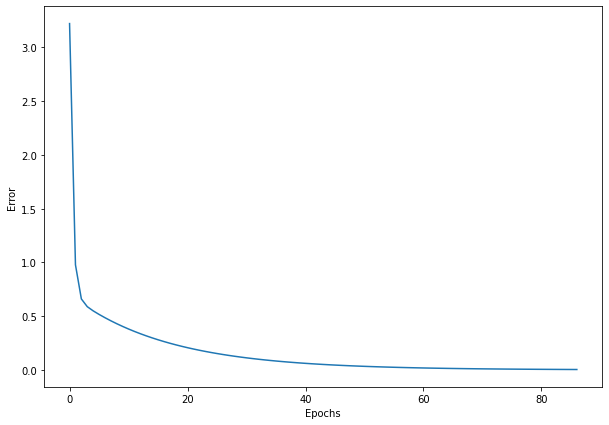

In [24]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

- 종료 후 확인한 w, b 계수가 샘플 데이터셋 생성시 설정한 w, b 계수와 비슷한 값임

### 1-2. 딥러닝 프로세스
#### 1. 데이터 전처리
- 데이터를 모델에 주입하기 전에 데이터를 가공하는 단계
#### 2. 모델 생성
- 모델의 구조를 정의하고 생성
- 순차적인 구조는 Sequential API, 다중 입력 및 출력의 복잡한 구조는 Functional API 혹은 Model Subclassing 방법으로 구현
#### 3. 모델 컴파일
- 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등을 정의
- 모델 인스턴스에 compile() 메소드를 적용하고 속성값을 설정
#### 4. 모델 훈련
- 훈련 데이터셋, 검증 데이터셋, epoch, 배치(batch) 크기 및 콜백(callback) 함수 등을 지정
#### 5. 모델 검증
- 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 예측값과 정답을 비교하여 평가지표를 계산
#### 6. 모델 예측
- 훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 그 결과를 반환

## 02. 단순 신경망 훈련
### 2-1. 선형회귀
- 회귀 분석 : 하나 이상의 독립변수들이 종속변수들에 미치는 영향을 추정하는 통계기법
### 2-2. 뉴런
- 인공 신경망 모델을 구성하는 하나의 신경, 노드(node)라고도 불림
- 신경망은 여러개의 레이어를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성
- 뉴런 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트된다
### 2-3. Dense 레이어
- 심층 신경망 모델을 구성하는 가장 기본 레이어
- 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결된 완전연결층 (fully connected layer)
- 모든 뉴런들이 정보(텐서)의 흐름을 나타내는 화살표로 연결됨
- Dense 레이어를 구성하는 노드 개수와 활성화 함수 지정 가능

In [25]:
# Dense layer 설정 예시
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

### 2-4. 데이터셋 만들기

In [26]:
# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


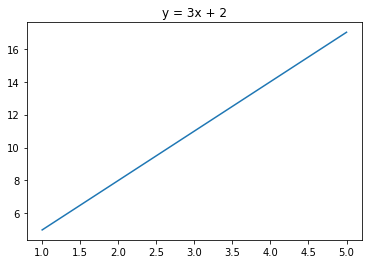

In [27]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

### 2-5. Sequential API
- 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식
- 입력 레이어부터 출력 레이어까지 순서를 가짐
- 입력 데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고, 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산을 수행
- 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없음

1. 모델 구조

In [28]:
import tensorflow as tf

## 1. 리스트형 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

## 2. add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

2. 입력 데이터 형태
- Sequential API 사용시 반드시 첫번째 층은 input_shape 매개변수 지정 (튜플 혹은 리스트 형태)

In [29]:
import tensorflow as tf
model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150, 4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]), # [4] 혹은 (4,)
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

3. 단순선형회귀 모델 정의
- 1개의 뉴런을 가지는 Dense 레이어 한개 사용
- 1개의 뉴런은 기울기에 해당하는 w와 상수항에 해당하는 b를 매개변수로 가짐
- y = wx + b 에서 입력데이터는 x값에 대한 입력변수 1개이기 때문에 input_shape = [1] 로 지정

In [30]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# use_bias = True 디폴트로 상수항 b가 추가됨

6. 모델 요약
- model.summary()로 요약 확인

In [31]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- Total params : 모델 내부에 존재하는 모든 파라미터의 합계
- Trainable params : 모델 훈련시 업데이트할 파라미터의 총 개수
- Non-trainable params : 훈련시 업데이트하지 않을 파라미터의 총 개수

7. 컴파일
- 옵티마이저, 손실함수, 평가지표 정의
 - 클래스 인스턴스, 함수, 사전 정의된 문자열로 지정
- 클래스 인스턴스로 지정시 학습률(learning rate), 모멘텀(momentum) 등의 하이퍼파라미터 직접 지정 가능
- 문자열로 지정할 경우 기본값으로 설정된 하이퍼파라미터를 사용하며 하이퍼파라미터 수정이 어려움

In [32]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
                       ])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [33]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

8. 훈련
- 가중치(weight) 텐서를 업데이트하는 과정
- fit() 메소드에 훈련용 데이터셋의 입력(x)과 출력(y), 반복 훈련할 epoch 수를 지정
- 매 epoch가 끝날때마다 훈련 데이터셋에 대한 손실과 평가 지표를 출력, verbose=0 지정시 미출력

In [34]:
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 337ms/step - loss: 53.5241 - mae: 6.9361
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 31.3449 - mae: 5.3514
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 18.4189 - mae: 4.1415
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 10.8852 - mae: 3.2177
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 6.4940 - mae: 2.5123


- 현재 과소적합상태
- `history` 변수는 epoch별 훈련 손실과 평가지표가 딕셔너리 형태로 저장됨

In [35]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 321ms/step - loss: 39.5399 - mae: 5.9989
Epoch 2/1200
1/1 [==============================] - 0s 11ms/step - loss: 23.2133 - mae: 4.6391
Epoch 3/1200
1/1 [==============================] - 0s 9ms/step - loss: 13.6978 - mae: 3.6009
Epoch 4/1200
1/1 [==============================] - 0s 8ms/step - loss: 8.1515 - mae: 2.8082
Epoch 5/1200
1/1 [==============================] - 0s 8ms/step - loss: 4.9182 - mae: 2.2028
Epoch 6/1200
1/1 [==============================] - 0s 10ms/step - loss: 3.0329 - mae: 1.7405
Epoch 7/1200
1/1 [==============================] - 0s 9ms/step - loss: 1.9331 - mae: 1.3874
Epoch 8/1200
1/1 [==============================] - 0s 8ms/step - loss: 1.2911 - mae: 1.1176
Epoch 9/1200
1/1 [==============================] - 0s 9ms/step - loss: 0.9159 - mae: 0.9115
Epoch 10/1200
1/1 [==============================] - 0s 6ms/step - loss: 0.6961 - mae: 0.7539
Epoch 11/1200
1/1 [==============================] - 0s 7ms/st

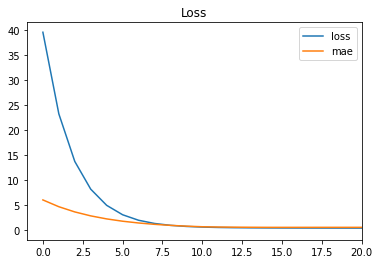

In [36]:
import matplotlib.pyplot as plt
# 20 epoch까지 loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

- 모딜 훈련 초기 단계에는 학습이 매우 빠른 속도로 진행되다가 일정 epoch 이후에는 학습 속도가 느려지는 패턴을 보이고 있음

9. 검증
- 모델 인스턴스의 evalute() 메소드로 모델의 성능 검증 가능
- 일반적으로 검증 데이터셋 입력

In [37]:
# 검증
model.evaluate(x, y) # 별도의 데이터셋 만들어두지 않았으므로 훈련데이터셋의 x, y 대입

1/1 [==============================] - 0s 146ms/step - loss: 1.2324e-04 - mae: 0.0095


[0.00012323635746724904, 0.00952835101634264]

- 모델이 훈련을 마친 상태의 가중치를 그대로 적용하여 손실과 평가 지표를 계산

10. 예측
- 훈련이 완료된 모델 인스턴스의 predict() 메소드에 새로운 입력 데이터를 넣어 모델의 예측값 도출

In [38]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 164ms/step


array([[32.04605]], dtype=float32)

## 03. 심층 신경망으로 이미지 분류
### 3-1. 케라스 내당 데이터셋 로드

In [39]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
# 훈련 셋과 검증 셋을 반환
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [40]:
# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


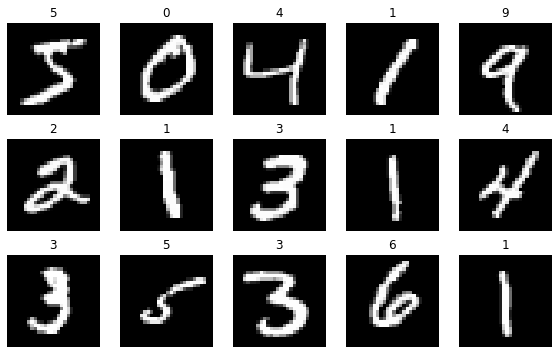

In [41]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### 3-2. 데이터 전처리

In [42]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [43]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train/x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [44]:
# test 셋에도 정규화 동일 적용
x_test = x_test/x_test.max()

# 변환후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

- 정규화하는 이유는 입력 데이터가 정규화되어 모델이 학습하는 경우 경사하강법 알고리즘에 의한 수렴 속도가 비정규화된 입력 데이터를 가질 때보다 더 빨리 수렴하기 때문
- 또한 국소 최적(local minimum)에 빠지는 현상을 방지해주는 효과도 있음

### 3-3. Flatten 레이어
- 정규화를 하더라도 개별 데이터 값의 범위는 축소되지만 원본 배열의 형태는 그대로 유지됨 
 - (60000, 28, 28), 60000은 데이터셋의 크기, 28, 28은 이미지의 크기 (2차원 입력
- Dense layer에는 입력값으로 반드시 1차원 배열이 들어가야 하기에 이미지 데이터를 1차원으로 전처리하여 주입

In [45]:
print(f'변경 전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [46]:
print(f'변경 전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


### 3-4. 활성화 함수
- 입력을 비선형 출력으로 변환해주는 함수
- 일반적으로 선형 관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현
- 시그모이드(Sigmoid), 하이퍼볼릭 탄젠트(Hyperbolic Tangent, tanh), ReLU, Leaky ReLU 등

In [47]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

### 3-5. 입력과 출력

- 첫번째 레이어에 입력데이터의 형태를 input_shape 매개변수로 지정
- 마지막 레이이어에 출력층의 형태 지정, 출력층의 노드 개수는 반드시 분류해야할 클래스 개수와 동일해야함

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드 = 10개(클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'),
])

# 노드 개수를 조금씩 줄여가면서 최종 출력 클래스 개수인 10개까지 정보를 축약하기 위한 설계
# 레이어의 개수(모델의 깊이)와 각 레이어를 구성하는 노드의 개수(모델의 너비)의 정답은 없으며 최적값을 찾기 위해서는 여러가지 시도를 해보아야 함

- 출력층 노드 개수가 2개 이상인 경우 (다중분류) `softmax` 활성화 함수 적용
- 이진분류 모델인 경우 `sigmoid` 활성화 함수 적용

In [49]:
# 출력층 노드 = 1인 경우. sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우. softmax
tf.keras.layers.Dense(10, activation='softmax')

### 3-6. 손실함수
- 모델의 출력층에 따라 올바른 손실함수를 설정해야만 모델이 정상적으로 훈련됨
 - 레이블이 원핫인코딩 O : categorical_crossentropy
 - 레이블이 원핫인코딩 X : sparse_categorical_crossentropy 혹은 categorical_crossentropy

In [50]:
# 이진분류(출력노드개수 = 1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [51]:
# y가 원핫 벡터인 경우
model.compile(loss='categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

### 3-7. 옵티마이저
- 손실을 낮추기 위해 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법
- 일반적으로 사용되는 알고리즘은 Adam

In [52]:
# 클래스 인스터스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### 3-8. 평가지표
- 'acc', 'auc', 'precision', 'recall' 등의 지표 사용
- 모델 컴파일 단계에서 metrics 매개변수에 파이썬 리스트 형태로 여러 지표를 동시에 참고 가능

In [53]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 3-9. 훈련
- 검증 셋 추가 지정시 매 epoch마다 훈련 손실과 검증 손실, 각 셋에 대한 평가지표 나란히 출력

In [54]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10,
          )

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2304 - accuracy: 0.9326 - val_loss: 0.1097 - val_accuracy: 0.9657
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0953 - accuracy: 0.9711 - val_loss: 0.0918 - val_accuracy: 0.9695
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0660 - accuracy: 0.9793 - val_loss: 0.0846 - val_accuracy: 0.9749
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0503 - accuracy: 0.9839 - val_loss: 0.0936 - val_accuracy: 0.9720
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0412 - accuracy: 0.9869 - val_loss: 0.0810 - val_accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.0877 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0273 - accuracy: 0.9909 - val_loss: 0.0803 - val_accurac

### 3-10. 평가

In [55]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)
print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0801 - accuracy: 0.9784
검증 셋 정확도: 0.9783999919891357


### 3-11. 예측

In [56]:
# 예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


- 모델이 예측한 결과를 넘파이 배열 형태로 저장
- 모델의 마지막 출력층의 노드 개수만큼의 값 저장

In [57]:
# 예측 결과 출력
predictions[0]

array([1.5007836e-09, 9.0984699e-08, 3.2870776e-06, 1.8454112e-07,
       1.5209949e-07, 8.2389345e-11, 5.3439186e-09, 9.9998611e-01,
       1.0891057e-08, 9.9612116e-06], dtype=float32)

- softmax 활성화함수를 거친 10개의 출력값은 순차적으로 0~9 10개의 개별 클래스에 대한 분류 확률값을 나타냄
- 이중 가장 높은 확률값을 가진 클래스가 최종 예측된 클래스

In [58]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


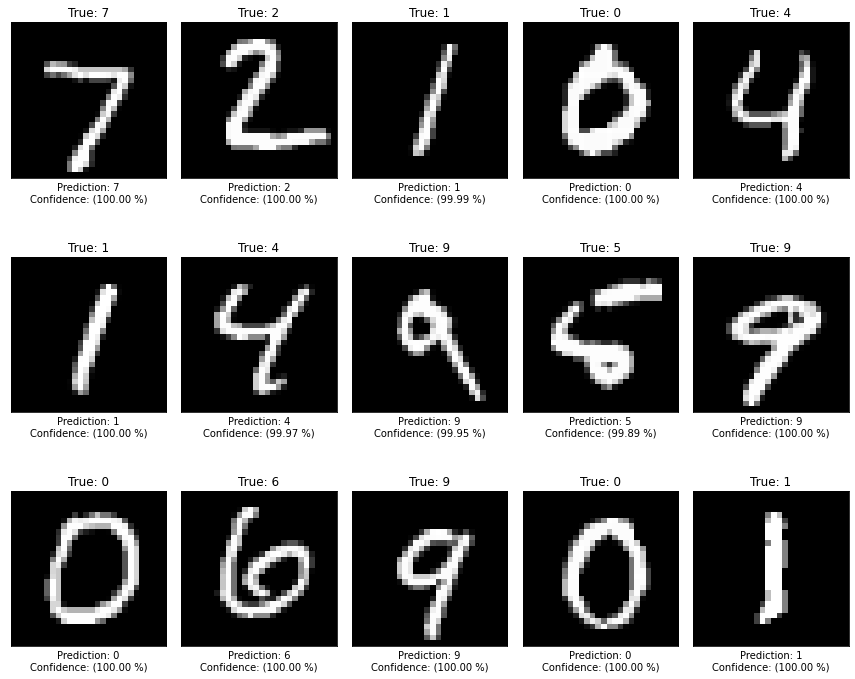

In [59]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imgshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()

## 04. 모델 세부 설정

In [60]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


### 4-1. 초기값 설정

In [61]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

- kernal_initializer 매개변수에 설정 가능

In [62]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])


# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


- 케라스에서 지원하는 자주 사용되는 초기화 목록
 - 'glorot_normal', 'glorot_uniform' : 글로럿 초기화(Xavier 초기화)
 - 'lecun_normal', 'lecun_uniform' : Yann Lecun 초기화
 - 'he_normal', 'he_uniform' : He 초기화
 - 'random_normal', 'random_unifor ' : 정규분포, 연속균등분포 초기화



### 4-2. 규제
- 기본값으로 규제를 적용하지 않고 있기 때문에 별도로 설정해 주어야 함

In [63]:
# 기본값 
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_52',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

### 4-3. 드롭아웃
- 과대적합 문제를 해결하기 위해 제안됨
- 노드의 일부 신호를 임의로 삭제, 모델이 학습하는 가중치 파라미터의 개수가 현저하게 줄어들게 함
- 훈련시에는 드롭아웃이 적용되어 노드중 일부만 훈련하게 되지만, 예측 시점에는 모든 노드들이 활용

In [64]:
# Dropout 25% 비율 적용(25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

### 4-4. 배치 정규화
- 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화
- 다음층으로 데이터가 전달되기 전 스케일을 조정하기 때문에 보다 안정적인 훈련이 가능하고 성능을 크게 향상시킴

In [78]:
# Model A : Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_a.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_74 (Dense)            (None, 64)                50240     
                                                                 
 dense_75 (Dense)            (None, 32)                2080      
                                                                 
 dense_76 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Model B : Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])
model_b.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_71 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_18 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 activation_9 (Activation)   (None, 64)                0         
                                                                 
 dense_72 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_19 (Bat  (None, 32)               128       
 chNormalization)                                    

- 훈련 결과 비교사 배치 정규화 추가 모델이 손실이 이전대비 더 안정적이고 빠르게 수렴
### 4-5. 활성화함수
- 클래스 인스턴스로 선언하여 하이퍼파라미터값을 변경하여 적용 가능

In [67]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [79]:
# Model C : Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2
    tf.keras.layers.LeakyReLU(alpha = 0.2),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.LeakyReLU(alpha = 0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])
model_c.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_77 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_20 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 64)                0         
                                                                 
 dense_78 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_21 (Bat  (None, 32)               128       
 chNormalization)                                    

- model_a, b, c를 동일한 조건으로 10번의 epoch동안 훈련한 후에 수렴 속도 확인
 - Model A : Dense 레이어 + ReLU 활성화 함수
 - Model B : Dense 레이어 + 배치 정규화
 - Model C : Dense 레이어 + 배치정규화 + LeakyReLU(0.2) 활성화 함수

In [80]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A : Dense + ReLU
history_a = model_a.fit(x_train, y_train, validation_data=(x_test, y_test),
                        epochs=10)

# Model B : Dense + BatchNorm + ReLU
history_b = model_a.fit(x_train, y_train, validation_data=(x_test, y_test),
                        epochs=10)

# Model C : Dense + BatchNorm + LeakyReLU(0.1)
history_c = model_a.fit(x_train, y_train, validation_data=(x_test, y_test),
                        epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2870 - accuracy: 0.9177 - val_loss: 0.1566 - val_accuracy: 0.9518
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1334 - accuracy: 0.9598 - val_loss: 0.1189 - val_accuracy: 0.9654
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0968 - accuracy: 0.9711 - val_loss: 0.1032 - val_accuracy: 0.9686
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0764 - accuracy: 0.9768 - val_loss: 0.0951 - val_accuracy: 0.9712
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0632 - accuracy: 0.9803 - val_loss: 0.0945 - val_accuracy: 0.9700
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0532 - accuracy: 0.9837 - val_loss: 0.0912 - val_accuracy: 0.9755
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0448 - accuracy: 0.9856 - val_loss: 0.0868 - val_accuracy:

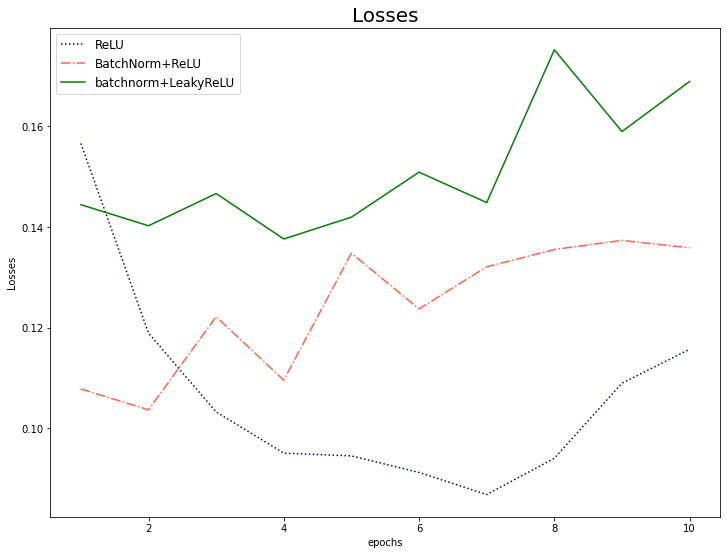

In [82]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1,11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1,11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm+ReLU', 'batchnorm+LeakyReLU'],fontsize=12)
plt.show()